In [1]:
  from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import os
from skimage.io import imread, imsave, imshow
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
from warnings import filterwarnings
%matplotlib inline
filterwarnings('ignore')

In [4]:
!mkdir /content/sample_data/lungs
!unzip /content/drive/MyDrive/lungs.zip -d /content/sample_data/lungs

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/sample_data/lungs/chest_xray/train/NORMAL/IM-0441-0001.jpeg  


In [5]:
labels=['NORMAL','PNEUMONIA']
dir_train='/content/sample_data/lungs/chest_xray/train'

In [6]:
normal_image=[]
pneu_image=[]
label_normal=[]
label_pneu=[]
for i in labels:
  for file in os.listdir(dir_train+'/'+i):
    if i=='NORMAL':
      img=imread(dir_train+'/'+i+'/'+file)
      normal_image.append(img)
      label_normal.append(i)
    else:
      img=imread(dir_train+'/'+i+'/'+file)
      pneu_image.append(img)
      label_pneu.append(i)

In [7]:
len(normal_image)

1341

In [8]:
normal_image=np.array(normal_image)
pneu_image=np.array(pneu_image)

In [9]:
small=normal_image[0]
for i in range(len(normal_image)):
  if normal_image[i].size<small.size:
    small=normal_image[i]
    print(i," ",small.shape)

13   (981, 1496)
23   (1032, 1256)
43   (769, 1186)
106   (792, 1056)
191   (800, 976)
684   (758, 994)
702   (672, 912)


In [10]:
small=pneu_image[0]
for i in range(len(pneu_image)):
  if pneu_image[i].size<small.size:
    small=pneu_image[i]
    print(i," ",small.shape)

5   (544, 848)
38   (289, 493, 3)
53   (194, 564, 3)
290   (188, 499, 3)
441   (360, 664)
799   (179, 438, 3)
990   (164, 399, 3)
1537   (132, 446, 3)
2644   (127, 384, 3)


In [11]:
normal_image[1226].shape

(1619, 1952)

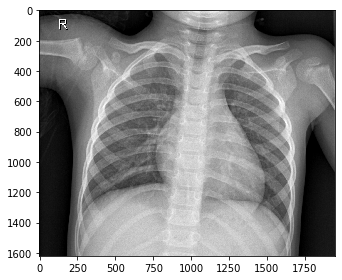

In [12]:
imshow(normal_image[1226])

In [13]:
for i in range(len(normal_image)):
  if len(normal_image[i].shape)>2:
    print('3 channel hai re baba')

In [14]:
count=0
for i in range(len(pneu_image)):
  if len(pneu_image[i].shape)>2:
    count+=1
print(count," ",len(pneu_image))

283   3875


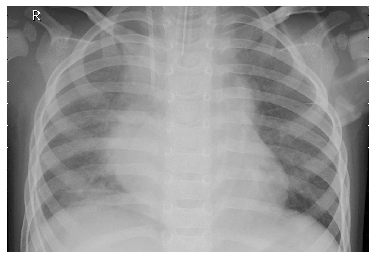

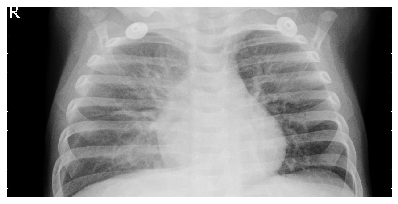

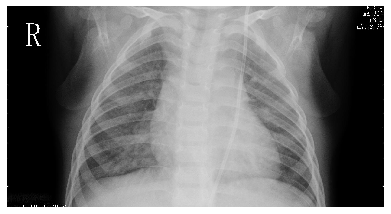

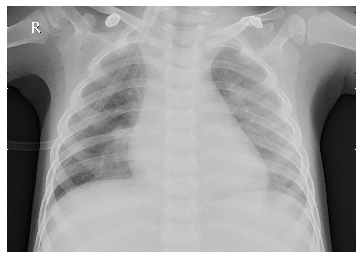

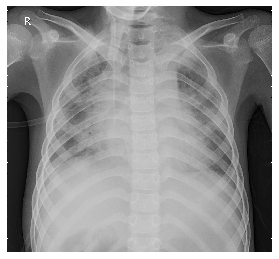

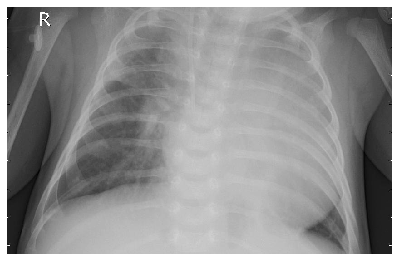

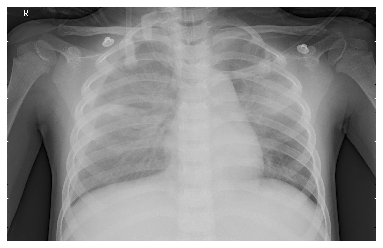

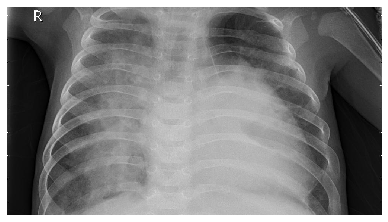

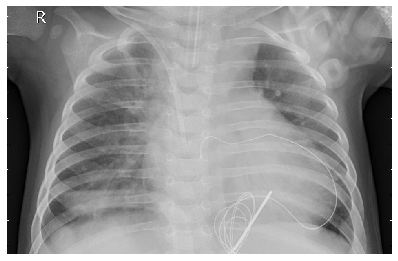

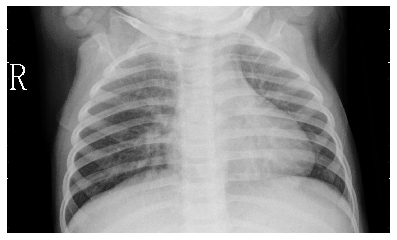

In [15]:
for i in range(10):
  imshow(pneu_image[i])
  plt.axis('off')
  plt.show()

In [16]:
for i in range(len(pneu_image)):
  if len(pneu_image[i].shape)>2:
    pneu_image[i] = cv2.cvtColor(pneu_image[i], cv2.COLOR_BGR2GRAY)

In [17]:
count=0
for i in range(len(pneu_image)):
  if len(pneu_image[i].shape)>2:
    count+=1
print(count," ",len(pneu_image))

0   3875


In [18]:
small=pneu_image[0]
for i in range(len(pneu_image)):
  if pneu_image[i].size < small.size:
    small=pneu_image[i]
    print(i," ",small.shape)

5   (544, 848)
10   (427, 795)
38   (289, 493)
53   (194, 564)
290   (188, 499)
610   (180, 452)
638   (175, 461)
799   (179, 438)
990   (164, 399)
1537   (132, 446)
2644   (127, 384)


In [19]:
pneu_image[3536].shape

(832, 1392)

In [20]:
# resizing all the images
resized_ims=[]
for i in normal_image:
  im= cv2.resize(i,(126,126))
  resized_ims.append(im)

In [21]:
for i in pneu_image:
  im= cv2.resize(i,(126,126))
  resized_ims.append(im)

In [22]:
len(resized_ims)

5216

In [23]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
for i in resized_ims:
  i=clahe.apply(i)

In [24]:
label=label_normal+label_pneu

In [25]:
len(label)

5216

In [26]:
all_data={label[i]:resized_ims[i] for i in range(len(label))}

In [27]:
all_data

{'NORMAL': array([[41, 48, 51, ..., 43, 38, 30],
        [32, 44, 50, ..., 39, 33, 26],
        [25, 36, 43, ..., 31, 25, 16],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 'PNEUMONIA': array([[  0, 255,   0, ...,   0,   0,   0],
        [  0, 255,   0, ...,   0,   0,   0],
        [  0, 254,   1, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)}

In [28]:
for i in resized_ims:
  if i.shape!=(126,126):
    print('Image size not valid')

In [29]:
x=np.array(resized_ims)
y=label

In [30]:
x.shape


(5216, 126, 126)

In [31]:
len(y)

5216

In [32]:
from keras.models import *
from keras.layers import *

In [33]:
!pip install np_utils

     |████████████████████████████████| 61kB 7.7MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-cp37-none-any.whl size=57126 sha256=ed954b93d255b3b21e6d9e3c8302e938e517dc8b7a0394e5524d34277d8c9c3f
  Stored in directory: /root/.cache/pip/wheels/92/4b/81/206efd0d01330a96f3aebe5021d2d5f0b264b7ade827c306ef
Successfully built np-utils


In [34]:
from keras.utils.np_utils import to_categorical

In [35]:
y=pd.get_dummies(y,drop_first=True)

y=to_categorical(y)

In [36]:
len(y)

5216

In [37]:
y[1].shape

(2,)

In [38]:
y[1]

array([1., 0.], dtype=float32)

In [39]:
x.max()

255

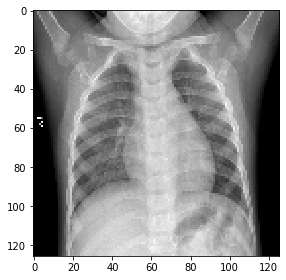

In [40]:
imshow(x[3])

In [41]:
x=x/x.max()

In [42]:
x=x.reshape(x.shape[0],126,126,1)

In [43]:
model=Sequential()
model.add(InputLayer(input_shape=(126,126,1)))
model.add(Conv2D(64,(5,5),activation='relu',strides=(1,1)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu',strides=(1,1)))
model.add(MaxPool2D((4,4)))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),activation='relu',strides=(1,1)))
model.add(MaxPool2D(4,4))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu',strides=(1,1)))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(units=288,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 61, 61, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       2

In [44]:
x=np.array(x)
from sklearn.model_selection import train_test_split as tts
x_train1,x_test,y_train1,y_test=tts(x,y,test_size=0.2)
x_train,x_val,y_train,y_val=tts(x_train1,y_train1)

In [45]:
x_train.shape

(3129, 126, 126, 1)

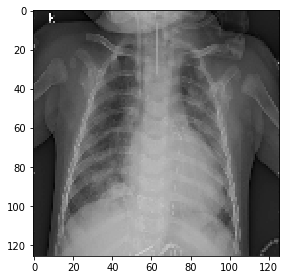

In [46]:
imshow(x_train[2].reshape(126,126))

In [47]:
y_train,y_test,y_val=np.array(y_train),np.array(y_test),np.array(y_val)

In [48]:
y_val[1]

array([0., 1.], dtype=float32)

In [49]:
from keras.optimizers import Adam

In [50]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
hist=model.fit(x_train,y_train,epochs=50,batch_size=64,validation_data=(x_val,y_val))

Epoch 1/50
49/49 [==============================] - 52s 101ms/step - loss: 0.5478 - accuracy: 0.7928 - val_loss: 0.5725 - val_accuracy: 0.7469
Epoch 2/50
49/49 [==============================] - 3s 56ms/step - loss: 0.2575 - accuracy: 0.9082 - val_loss: 0.7975 - val_accuracy: 0.7469
Epoch 3/50
49/49 [==============================] - 3s 56ms/step - loss: 0.1563 - accuracy: 0.9589 - val_loss: 1.0139 - val_accuracy: 0.7469
Epoch 4/50
49/49 [==============================] - 3s 56ms/step - loss: 0.1162 - accuracy: 0.9733 - val_loss: 1.1985 - val_accuracy: 0.7469
Epoch 5/50
49/49 [==============================] - 3s 56ms/step - loss: 0.0810 - accuracy: 0.9819 - val_loss: 1.2819 - val_accuracy: 0.7469
Epoch 6/50
49/49 [==============================] - 3s 56ms/step - loss: 0.0721 - accuracy: 0.9841 - val_loss: 1.4588 - val_accuracy: 0.7469
Epoch 7/50
49/49 [==============================] - 3s 57ms/step - loss: 0.0437 - accuracy: 0.9928 - val_loss: 1.5743 - val_accuracy: 0.7469
Epoch 8/50


In [51]:
model_history=hist.history

In [52]:
train_loss=model_history.get('loss')
val_loss=model_history.get('val_loss')
train_acc=model_history.get('accuracy')
val_acc=model_history.get('val_accuracy')

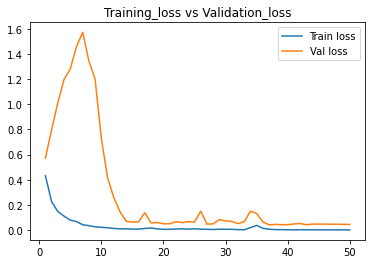

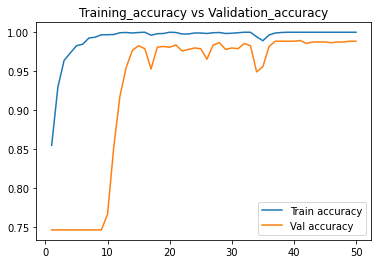

In [54]:
plt.plot(np.arange(1,51),train_loss,label='Train loss')
plt.plot(np.arange(1,51),val_loss,label='Val loss')
plt.title('Training_loss vs Validation_loss')
plt.legend()
plt.show()
 
plt.plot(np.arange(1,51),train_acc,label='Train accuracy')
plt.plot(np.arange(1,51),val_acc,label='Val accuracy')
plt.title('Training_accuracy vs Validation_accuracy')
plt.legend()
plt.show()

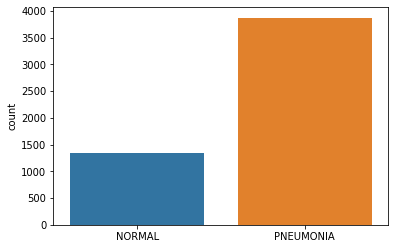

In [55]:
sn.countplot(label)

In [56]:
train_count=[]
for i in range(len(y_train)):
  if y_train[i][0]==1:
    train_count.append('Normal')
  else: train_count.append('Pneu')

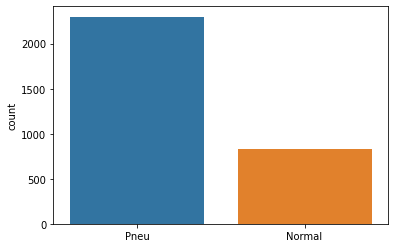

In [57]:
sn.countplot(train_count)
plt.show()

In [58]:
model.evaluate(x_test,y_test)

33/33 [==============================] - 1s 17ms/step - loss: 0.0846 - accuracy: 0.9828


[0.0845566838979721, 0.982758641242981]